In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

In [4]:
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
#EDA: checking top of dataset
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
#renaming features with more intuitive labels 
dataset.rename(columns={'FAVC': 'high_cal_food', 'FCVC': 'vegetables', 'NCP': 'meals', 'CAEC': 'snacks',\
                        'SMOKE': 'smoke','CH2O': 'water', 'SCC': 'cal_counting', 'FAF': 'exercise', \
                        'TUE': 'tech', 'CALC': 'alcohol', 'MTRANS': 'transport', 'NObeyesdad': 'weight_category'}, inplace=True)

In [7]:
#check that renaming features worked as expected
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,vegetables,meals,snacks,smoke,water,cal_counting,exercise,tech,alcohol,transport,weight_category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
#EDA: check number of instances and features 
dataset.shape

(2111, 17)

In [9]:
#EDA: get information about datatypes 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   high_cal_food                   2111 non-null   object 
 6   vegetables                      2111 non-null   float64
 7   meals                           2111 non-null   float64
 8   snacks                          2111 non-null   object 
 9   smoke                           2111 non-null   object 
 10  water                           2111 non-null   float64
 11  cal_counting                    2111 non-null   object 
 12  exercise                        21

In [10]:
#EDA: double-check for any missing values 
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
high_cal_food                     0
vegetables                        0
meals                             0
snacks                            0
smoke                             0
water                             0
cal_counting                      0
exercise                          0
tech                              0
alcohol                           0
transport                         0
weight_category                   0
dtype: int64

In [11]:
#EDA: get statistical summary of data for every feature (unique count, mean, min, median, max, standard deviation)
dataset.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food,vegetables,meals,snacks,smoke,water,cal_counting,exercise,tech,alcohol,transport,weight_category
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [12]:
#EDA: value counts of target variable, to check if dataset has class imbalance
dataset['weight_category'].value_counts()

weight_category
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

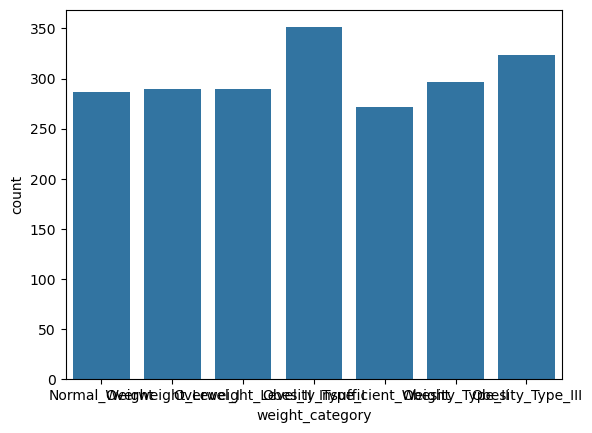

In [13]:
sns.countplot(dataset, x='weight_category')
plt.show()

In [14]:
#encoding categoric data into numeric, as KNN uses numeric data 
dataset['Gender']=dataset['Gender'].replace(['Male','Female'],[0,1])
dataset['family_history_with_overweight']=dataset['family_history_with_overweight'].replace(['no','yes'],[0,1])
dataset['high_cal_food']=dataset['high_cal_food'].replace(['no','yes'],[0,1])
dataset['snacks']=dataset['snacks'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])
dataset['smoke']=dataset['smoke'].replace(['no','yes'],[0,1])
dataset['cal_counting']=dataset['cal_counting'].replace(['no','yes'],[0,1])
dataset['alcohol']=dataset['alcohol'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])
dataset['transport']=dataset['transport'].replace(['Walking','Bike','Public_Transportation','Automobile','Motorbike'],[0,1,2,3,4])

C:\Users\maria\AppData\Local\Temp\ipykernel_16304\2531340821.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender']=dataset['Gender'].replace(['Male','Female'],[0,1])
C:\Users\maria\AppData\Local\Temp\ipykernel_16304\2531340821.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['family_history_with_overweight']=dataset['family_history_with_overweight'].replace(['no','yes'],[0,1])
C:\Users\maria\AppData\Local\Temp\ipykernel_16304\2531340821.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated

In [15]:
pd.set_option('future.no_silent_downcasting', True)

In [16]:
#checking unique data values in dataset, following encoding 
dataset.apply(pd.unique)

Gender                                                                       [1, 0]
Age                               [21.0, 23.0, 27.0, 22.0, 29.0, 24.0, 26.0, 41....
Height                            [1.62, 1.52, 1.8, 1.78, 1.5, 1.64, 1.72, 1.85,...
Weight                            [64.0, 56.0, 77.0, 87.0, 89.8, 53.0, 55.0, 68....
family_history_with_overweight                                               [1, 0]
high_cal_food                                                                [0, 1]
vegetables                        [2.0, 3.0, 1.0, 2.450218, 2.880161, 2.00876, 2...
meals                             [3.0, 1.0, 4.0, 3.28926, 3.995147, 1.72626, 2....
snacks                                                                 [1, 2, 3, 0]
smoke                                                                        [0, 1]
water                             [2.0, 3.0, 1.0, 1.152736, 1.115967, 2.704507, ...
cal_counting                                                                

In [17]:
#splitting dataset into class label / output (y) and input (X). Height and weight omitted from X as these are used to determine weight category
X = dataset.iloc[:, [0,1,4,5,6,7,8,9,10,11,12,13,14,15]].values
y = dataset.iloc[:, 16].values

In [18]:
#splitting dataset into training set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
#scaling features to avoid age feature (which has large values compared to other features) dominating other features 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [20]:
#fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [21]:
#predicting the test set results
y_pred=classifier.predict(X_test_s)

In [22]:
#evaluating model's performance 
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result) 

accuracy:0.76


Confusion Matrix:
[[ 78   8   1   1   0   0   2]
 [ 29  37   4   2   0   9   6]
 [  1   4  81   4   2   1  10]
 [  0   3   2  84   0   1   0]
 [  0   0   0   1 100   0   0]
 [  2   7  12   4   1  52   3]
 [  4   9   7  10   0   5  47]] 


--------------------------------------
Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.68      0.87      0.76        90
      Normal_Weight       0.54      0.43      0.48        87
     Obesity_Type_I       0.76      0.79      0.77       103
    Obesity_Type_II       0.79      0.93      0.86        90
   Obesity_Type_III       0.97      0.99      0.98       101
 Overweight_Level_I       0.76      0.64      0.70        81
Overweight_Level_II       0.69      0.57      0.63        82

           accuracy                           0.76       634
          macro avg       0.74      0.75      0.74       634
       weighted avg       0.75      0.76      0.75       634



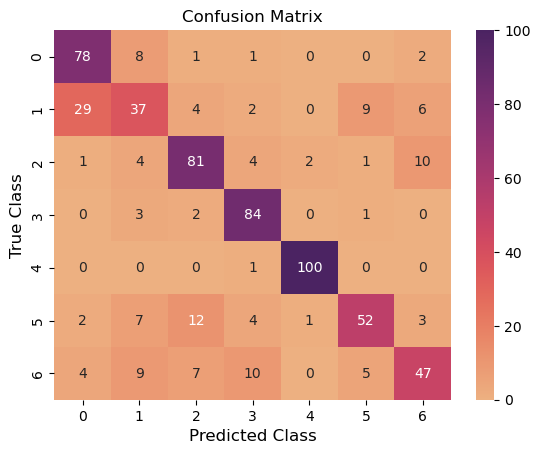

In [23]:
#colour-coding the confusion matrix using a heatmap
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()